In [71]:
## import pandas 
import pandas as pd

## read in data
data = pd.read_csv("shelter-animal-outcomes/train.csv.gz")
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [133]:
## describe data
data.describe().T

,count,unique,top,freq
AnimalID,26729,26729,A707321,1
Name,19038,6374,Max,136
DateTime,26729,22918,2015-08-11 00:00:00,19
OutcomeType,26729,5,Adoption,10769
OutcomeSubtype,13117,16,Partner,7816
AnimalType,26729,2,Dog,15595
SexuponOutcome,26728,5,Neutered Male,9779
AgeuponOutcome,26711,44,1 year,3969
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824


In [73]:
## describe categorical vars
string_data = data.select_dtypes(['object'])
string_data.describe().T.sort_index()

,count,unique,top,freq
AgeuponOutcome,26711,44,1 year,3969
AnimalID,26729,26729,A707321,1
AnimalType,26729,2,Dog,15595
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824
DateTime,26729,22918,2015-08-11 00:00:00,19
Name,19038,6374,Max,136
OutcomeSubtype,13117,16,Partner,7816
OutcomeType,26729,5,Adoption,10769
SexuponOutcome,26728,5,Neutered Male,9779


In [115]:
## Age Upon Outcome
data["AgeuponOutcome"].value_counts().iloc[:10] ##.sort_index()

1 year      3969
2 years     3742
2 months    3397
3 years     1823
1 month     1281
3 months    1277
4 years     1071
5 years      992
4 months     888
6 years      670
Name: AgeuponOutcome, dtype: int64

In [78]:
data["AnimalType"].value_counts().sort_index()

Cat    11134
Dog    15595
Name: AnimalType, dtype: int64

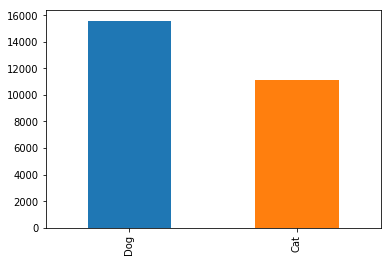

In [80]:
%matplotlib inline
data["AnimalType"].value_counts().plot.bar()

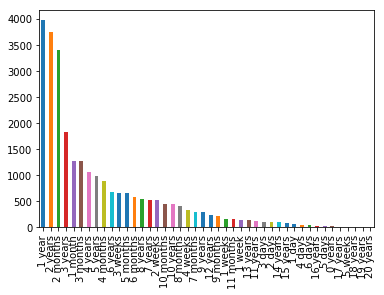

In [81]:
%matplotlib inline
data["AgeuponOutcome"].value_counts().plot.bar()

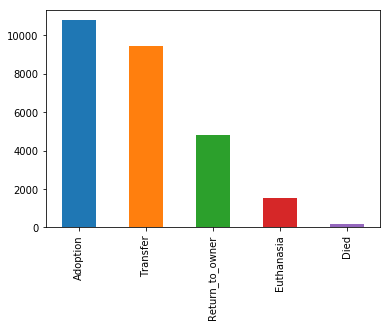

In [83]:
%matplotlib inline
data["OutcomeType"].value_counts().plot.bar()

In [84]:
%matplotlib inline
data["Color"].value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Brown Brindle/White           450
Blue                          450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

In [132]:
# new data frame with split value columns 
data["First_Color"] = data["Color"].str.split("/", n = 1, expand = True)[0]
data["Second_Color"] = data["Color"].str.split("/", n = 1, expand = True)[1]
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,First_Color,Second_Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Brown,White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Cream Tabby,None
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Blue,White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Blue Cream,None
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Tan,None
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,Black,Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,Blue Tabby,None
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,Brown Tabby,None
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,Red,White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,White,None


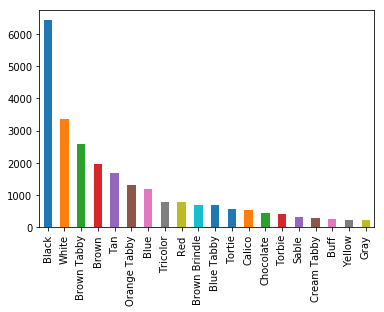

In [106]:
%matplotlib inline
data["First_Color"].value_counts().iloc[0:20].plot.bar()

In [64]:
# new data frame with split value columns 
data["Breed"].str.split("/", n = 10, expand = True)

,0,1,2
0,Shetland Sheepdog Mix,None,None
1,Domestic Shorthair Mix,None,None
2,Pit Bull Mix,None,None
3,Domestic Shorthair Mix,None,None
4,Lhasa Apso,Miniature Poodle,None
5,Cairn Terrier,Chihuahua Shorthair,None
6,Domestic Shorthair Mix,None,None
7,Domestic Shorthair Mix,None,None
8,American Pit Bull Terrier Mix,None,None
9,Cairn Terrier,None,None


In [70]:
pd.crosstab(data.OutcomeSubtype, data.OutcomeType, margins=True)

OutcomeType,Adoption,Died,Euthanasia,Transfer,All
OutcomeSubtype,,,,,
Aggressive,0,0,320,0,320
At Vet,0,4,0,0,4
Barn,1,0,0,1,2
Behavior,0,0,86,0,86
Court/Investigation,0,0,6,0,6
Enroute,0,8,0,0,8
Foster,1800,0,0,0,1800
In Foster,0,52,0,0,52
In Kennel,0,114,0,0,114


In [118]:
data["Name"].value_counts(dropna = False).iloc[:20]

NaN         7691
Max          136
Bella        135
Charlie      107
Daisy        106
Lucy          94
Buddy         87
Princess      86
Rocky         85
Luna          68
Jack          66
Lola          61
Sadie         58
Shadow        57
Molly         57
Coco          55
Maggie        55
Chico         54
Oreo          53
Lily          53
Name: Name, dtype: int64

In [131]:
print('Original dataset dimensions = ',data.shape)
print('Using dropna on original dataset dimensions = ',data.dropna().shape)
print('Remove outcome subtype and name dimensions = ',data.drop(columns=['OutcomeSubtype', 'Name']).dropna().shape)

Original dataset dimensions =  (26729, 12)
Using dropna on original dataset dimensions =  (3685, 12)
Remove outcome subtype and name dimensions =  (13920, 10)


In [134]:
print('Remove outcome subtype and name dimensions = ',data.drop(columns=['OutcomeSubtype', 'Name', 'Second_Color']).dropna().shape)

Remove outcome subtype and name dimensions =  (26710, 9)


In [136]:
data = data.drop(columns=['OutcomeSubtype', 'Name', 'Second_Color']).dropna()

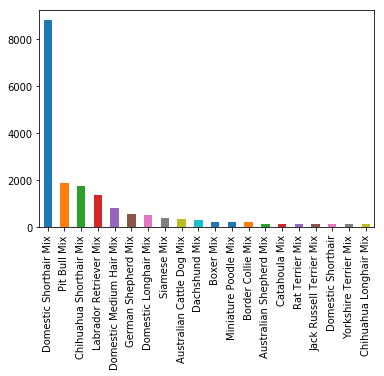

In [137]:
%matplotlib inline
data["Breed"].value_counts().iloc[0:20].plot.bar()